# Practica m30: Ian Badillo
## KNN

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.neighbors import NearestNeighbors

os.chdir('./')

In [11]:
wines_data = pd.read_csv('wine-clustering.csv')
wines_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [12]:
k = 5

test = pd.DataFrame({
    'Alcohol': [14],'Malic_Acid': [2],'Ash': [2.5],'Ash_Alcanity': [16],'Magnesium': [115],
    'Total_Phenols': [3],'Flavanoids': [2.5],'Nonflavanoid_Phenols': [0.4],
    'Proanthocyanins': [2],'Color_Intensity': [9],'Hue': [1],'OD280': [3.5],'Proline': [800]
})

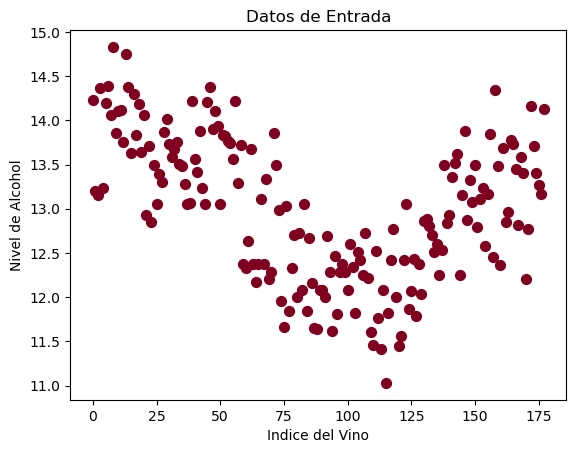

In [13]:
# Visualizacion de observaciónes en base al nivel de Alcohol
plt.figure()
plt.title('Datos de Entrada')
plt.xlabel('Indice del Vino')
plt.ylabel('Nivel de Alcohol')
plt.scatter(wines_data.index, wines_data['Alcohol'], marker = 'o', s = 50, color = '#800020')

In [14]:
# Ejecucion del Algoritmo
knn_model = NearestNeighbors(n_neighbors = k, algorithm = 'auto').fit(wines_data)
distances, indices = knn_model.kneighbors(test)

In [15]:
print(f'{k} vecinos mas cercanos: ')
for rank, index in enumerate(indices[0][:k], start = 1):
    print(str(rank) + ' is', wines_data.index[index])

5 vecinos mas cercanos: 
1 is 40
2 is 20
3 is 25
4 is 21
5 is 141


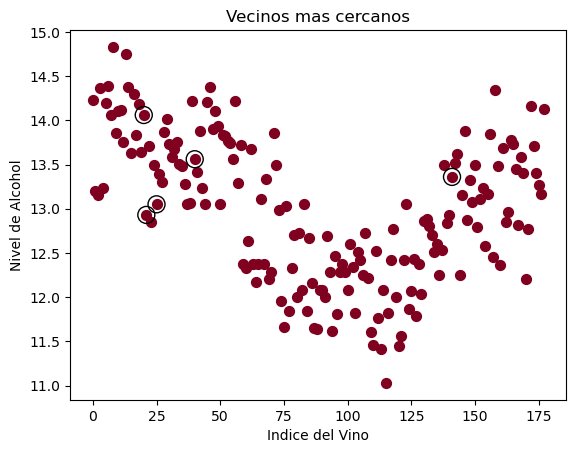

In [17]:
neighbor_indices = indices[0]
neighbors = wines_data.iloc[neighbor_indices]

# Visualizacion de los 5 vecinos mas cercanos
plt.figure()
plt.title('Vecinos mas cercanos')
plt.scatter(wines_data.index, wines_data['Alcohol'], marker = 'o', s = 50, color = '#800020')
plt.scatter(neighbors.index, neighbors['Alcohol'], marker = 'o', s = 150, color = 'black', facecolors = 'none')
plt.xlabel('Indice del Vino')
plt.ylabel('Nivel de Alcohol')
plt.show()

In [87]:
alcohol_mean = neighbors['Alcohol'].mean()

print('Concentracion del Alcohol de los 5 vecinos mas cercanos: ')
for i, value in enumerate(neighbors['Alcohol'], start=1):
    print(f'{i}. {value}')

print(f'Promedio de Alcohol de los {k} vecinos mas cercanos: {alcohol_mean:.2f}')

Concentracion del Alcohol de los 5 vecinos mas cercanos: 
1. 13.56
2. 14.06
3. 13.05
4. 12.93
5. 13.36
Promedio de Alcohol de los 5 vecinos mas cercanos: 13.39


## Market Basket

In [67]:
from sklearn.preprocessing import MultiLabelBinarizer
from mlxtend.frequent_patterns import apriori

# Tickets de compra

my_basket = [['bread', 'butter', 'wine', 'bananas', 'coffee', 'carrots'],
    ['tomatoes', 'onions', 'cheese', 'milk', 'potatoes'],
    ['beer', 'chips', 'asparagus', 'salsa', 'milk', 'apples'],
    ['olive oil', 'bread', 'butter', 'tomatoes', 'steak', 'carrots'],
    ['tomatoes', 'onions', 'chips', 'wine', 'ketchup', 'orange juice'],
    ['bread', 'butter', 'beer', 'chips', 'milk'],
    ['butter', 'tomatoes', 'carrots', 'coffee', 'sugar'],
    ['tomatoes', 'onions', 'cheese', 'milk', 'potatoes'],
    ['bread', 'butter', 'ketchup', 'coffee', 'chicken wings'],
    ['butter', 'beer', 'chips', 'asparagus', 'apples'],
    ['tomatoes', 'onion', 'beer', 'chips', 'milk', 'coffee']]


mlb = MultiLabelBinarizer()

basket_binary = pd.DataFrame(mlb.fit_transform(my_basket), columns = mlb.classes_)
basket_binary.index.name = 'TicketNo'

basket_binary

,apples,asparagus,bananas,beer,bread,butter,carrots,cheese,chicken wings,chips,...,olive oil,onion,onions,orange juice,potatoes,salsa,steak,sugar,tomatoes,wine
TicketNo,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,1
5,0,0,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
8,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# Analisis 'A priori' con soporte minimo del 20%
articulos_frecuentes = apriori(basket_binary, min_support = 0.2,
                              use_colnames = True).sort_values('support', ascending = False).reset_index(drop = True)
articulos_frecuentes['length'] = articulos_frecuentes['itemsets'].apply(lambda x: len(x))
articulos_frecuentes

/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.545455,(tomatoes),1
1,0.545455,(butter),1
2,0.454545,(chips),1
3,0.454545,(milk),1
4,0.363636,(beer),1
5,0.363636,"(bread, butter)",2
6,0.363636,(bread),1
7,0.363636,"(chips, beer)",2
8,0.363636,(coffee),1
9,0.272727,(onions),1


In [81]:
from mlxtend.frequent_patterns import association_rules

In [83]:
association_rules(articulos_frecuentes, metric = 'confidence',
                 min_threshold = 0.5).sort_values('confidence', ascending = False).reset_index(drop = True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(bread),(butter),0.363636,0.545455,0.363636,1.000000,1.833333,1.0,0.165289,inf,0.714286,0.666667,1.000000,0.833333
1,(onions),(tomatoes),0.272727,0.545455,0.272727,1.000000,1.833333,1.0,0.123967,inf,0.625000,0.500000,1.000000,0.750000
2,(beer),(chips),0.363636,0.454545,0.363636,1.000000,2.200000,1.0,0.198347,inf,0.857143,0.800000,1.000000,0.900000
3,"(milk, beer)",(chips),0.272727,0.454545,0.272727,1.000000,2.200000,1.0,0.148760,inf,0.750000,0.600000,1.000000,0.800000
4,(carrots),(butter),0.272727,0.545455,0.272727,1.000000,1.833333,1.0,0.123967,inf,0.625000,0.500000,1.000000,0.750000
5,"(chips, milk)",(beer),0.272727,0.363636,0.272727,1.000000,2.750000,1.0,0.173554,inf,0.875000,0.750000,1.000000,0.875000
6,(chips),(beer),0.454545,0.363636,0.363636,0.800000,2.200000,1.0,0.198347,3.181818,1.000000,0.800000,0.685714,0.900000
7,"(chips, beer)",(milk),0.363636,0.454545,0.272727,0.750000,1.650000,1.0,0.107438,2.181818,0.619048,0.500000,0.541667,0.675000
8,(beer),"(chips, milk)",0.363636,0.272727,0.272727,0.750000,2.750000,1.0,0.173554,2.909091,1.000000,0.750000,0.656250,0.875000
9,(coffee),(butter),0.363636,0.545455,0.272727,0.750000,1.375000,1.0,0.074380,1.818182,0.428571,0.428571,0.450000,0.625000


In [85]:
association_rules(articulos_frecuentes, metric = 'lift',
                 min_threshold = 0.5).sort_values('lift', ascending = False).reset_index(drop = True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beer),"(chips, milk)",0.363636,0.272727,0.272727,0.750000,2.750000,1.0,0.173554,2.909091,1.000000,0.750000,0.656250,0.875000
1,"(chips, milk)",(beer),0.272727,0.363636,0.272727,1.000000,2.750000,1.0,0.173554,inf,0.875000,0.750000,1.000000,0.875000
2,(chips),(beer),0.454545,0.363636,0.363636,0.800000,2.200000,1.0,0.198347,3.181818,1.000000,0.800000,0.685714,0.900000
3,(beer),(chips),0.363636,0.454545,0.363636,1.000000,2.200000,1.0,0.198347,inf,0.857143,0.800000,1.000000,0.900000
4,(chips),"(milk, beer)",0.454545,0.272727,0.272727,0.600000,2.200000,1.0,0.148760,1.818182,1.000000,0.600000,0.450000,0.800000
5,"(milk, beer)",(chips),0.272727,0.454545,0.272727,1.000000,2.200000,1.0,0.148760,inf,0.750000,0.600000,1.000000,0.800000
6,(butter),(bread),0.545455,0.363636,0.363636,0.666667,1.833333,1.0,0.165289,1.909091,1.000000,0.666667,0.476190,0.833333
7,(onions),(tomatoes),0.272727,0.545455,0.272727,1.000000,1.833333,1.0,0.123967,inf,0.625000,0.500000,1.000000,0.750000
8,(tomatoes),(onions),0.545455,0.272727,0.272727,0.500000,1.833333,1.0,0.123967,1.454545,1.000000,0.500000,0.312500,0.750000
9,(bread),(butter),0.363636,0.545455,0.363636,1.000000,1.833333,1.0,0.165289,inf,0.714286,0.666667,1.000000,0.833333
